In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
meta = pd.read_csv('/home/kurmukovai/HCP/old_code/unrestricted_hcp_freesurfer.csv')
thickness = pd.DataFrame(columns = [['rh_thick', 'lh_thick',
                           'rh_thick_2e-4', 'lh_thick_2e-4',
                           'rh_thick_2e-4_sampled', 'lh_thick_2e-4_sampled']], dtype='float32')
thickness[['Subject', 'Gender']] = meta[['Subject', 'Gender']]

In [3]:
path = '/cobrain/groups/ml_group/data/HCP_1200/shapes/'
for folder in tqdm(sorted(os.listdir(path))):
    for hem in ['rh', 'lh']:
        filename_sampled = '{}{}/{}_thick_2e-4_sampled.raw'.format(path, folder, hem)
        filename_2e_4 = '{}{}/{}_thick_2e-4.raw'.format(path, folder, hem)
        filename = '{}{}/{}_thick.raw'.format(path, folder, hem)
        
        thick_sampled = np.fromfile(filename_sampled, dtype='float32')
        thick_2e_4 = np.fromfile(filename_2e_4, dtype='float32')
        thick = np.fromfile(filename, dtype='float32')

        thickness.loc[thickness.Subject == int(folder), '{}_thick_2e-4_sampled'.format(hem)] = thick_sampled.sum()
        thickness.loc[thickness.Subject == int(folder), '{}_thick_2e-4'.format(hem)] = thick_2e_4.sum()
        thickness.loc[thickness.Subject == int(folder), '{}_thick'.format(hem)] = thick.sum()


100%|██████████| 1113/1113 [05:00<00:00,  3.70it/s]


In [4]:
thickness.head()

,rh_thick,lh_thick,rh_thick_2e-4,lh_thick_2e-4,rh_thick_2e-4_sampled,lh_thick_2e-4_sampled,Subject,Gender
0,422543.75000,423067.50000,422012.40625,422752.78125,402045.71875,406941.68750,100206,M
1,337991.75000,339279.56250,338824.53125,340062.75000,427877.40625,420797.21875,100307,F
2,370140.46875,361412.21875,370260.06250,361756.53125,399484.96875,396977.50000,100408,M
3,385036.03125,387598.53125,385061.09375,387873.78125,414121.15625,415922.75000,100610,M
4,299100.56250,288223.28125,299500.75000,288653.56250,415710.56250,396871.21875,101006,F


Thickness (Recomputed, after step 13)


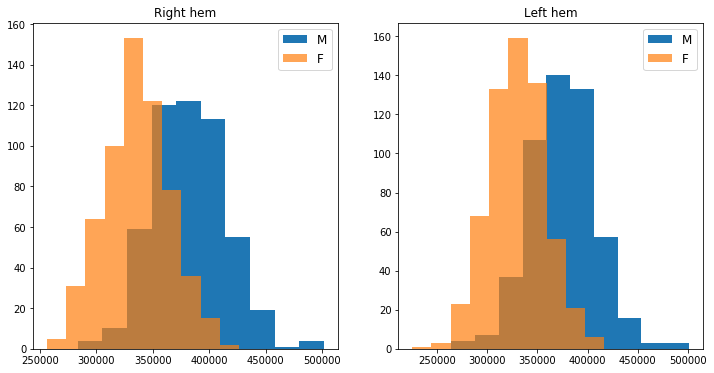

In [82]:
print('Thickness (Recomputed, after step 13)')
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

rh_m = thickness[thickness.Gender=='M']['rh_thick'].values
rh_f = thickness[thickness.Gender=='F']['rh_thick'].values

lh_m = thickness[thickness.Gender=='M']['lh_thick'].values
lh_f = thickness[thickness.Gender=='F']['lh_thick'].values

ax[0].hist(rh_m, label='M')
ax[0].hist(rh_f, label='F', alpha=0.7)
ax[0].legend()
ax[0].set_title('Right hem')

ax[1].hist(lh_m, label='M')
ax[1].hist(lh_f, label='F', alpha=0.7);
ax[1].legend()
ax[1].set_title('Left hem');

Thickness smoothed 2e-4 (Recomputed after step 14)


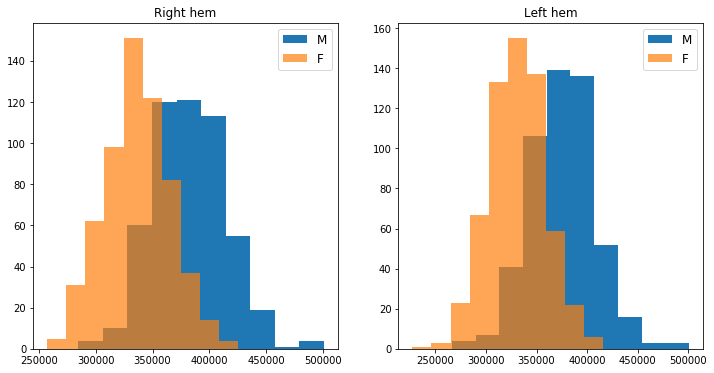

In [83]:
print('Thickness smoothed 2e-4 (Recomputed after step 14)')
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

rh_m = thickness[thickness.Gender=='M']['rh_thick_2e-4'].values
rh_f = thickness[thickness.Gender=='F']['rh_thick_2e-4'].values

lh_m = thickness[thickness.Gender=='M']['lh_thick_2e-4'].values
lh_f = thickness[thickness.Gender=='F']['lh_thick_2e-4'].values

ax[0].hist(rh_m, label='M')
ax[0].hist(rh_f, label='F', alpha=0.7)
ax[0].legend()
ax[0].set_title('Right hem')

ax[1].hist(lh_m, label='M')
ax[1].hist(lh_f, label='F', alpha=0.7);
ax[1].legend()
ax[1].set_title('Left hem');

Thickness smoothed 2e-4 and sampled (Recomputed after 15)


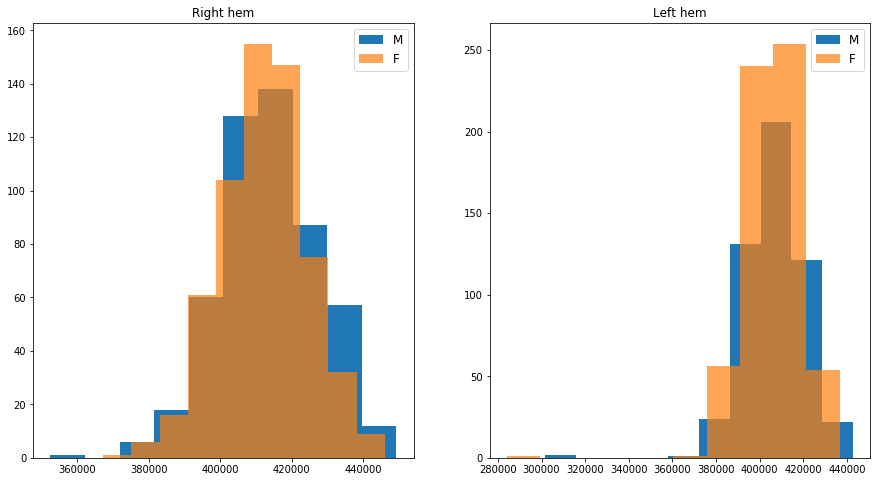

In [84]:
print('Thickness smoothed 2e-4 and sampled (Recomputed after 15)')
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

rh_m = thickness[thickness.Gender=='M']['rh_thick_2e-4_sampled'].values
rh_f = thickness[thickness.Gender=='F']['rh_thick_2e-4_sampled'].values

lh_m = thickness[thickness.Gender=='M']['lh_thick_2e-4_sampled'].values
lh_f = thickness[thickness.Gender=='F']['lh_thick_2e-4_sampled'].values

ax[0].hist(rh_m, label='M')
ax[0].hist(rh_f, label='F', alpha=0.7)
ax[0].legend()
ax[0].set_title('Right hem')

ax[1].hist(lh_m, label='M')
ax[1].hist(lh_f, label='F', alpha=0.7);
ax[1].legend()
ax[1].set_title('Left hem');

In [56]:
thickness['RH_thick_smooth_2e-4'] = np.nan
thickness['LH_thick_smooth_2e-4'] = np.nan

In [41]:
thickness.head()

,rh_thick,lh_thick,rh_thick_2e-4,lh_thick_2e-4,rh_thick_2e-4_sampled,lh_thick_2e-4_sampled,Subject,Gender,RH_thick_smooth_2e-4,LH_thick_smooth_2e-4
0,422543.75000,423067.50000,422012.40625,422752.78125,402045.71875,406941.68750,100206,M,404513,404091
1,337991.75000,339279.56250,338824.53125,340062.75000,427877.40625,420797.21875,100307,F,423410,418271
2,370140.46875,361412.21875,370260.06250,361756.53125,399484.96875,396977.50000,100408,M,404853,391357
3,385036.03125,387598.53125,385061.09375,387873.78125,414121.15625,415922.75000,100610,M,404124,413347
4,299100.56250,288223.28125,299500.75000,288653.56250,415710.56250,396871.21875,101006,F,403278,392911


In [57]:
source_path = '/home/bgutman/datasets/HCP/FreeSurfer/thickness/'
for folder in tqdm(os.listdir(source_path)):
    for hem in ['RH', 'LH']:
        filename_smoothed = '{}{}/{}_thick_smooth_2e-4.raw'.format(source_path, folder, hem)
        
        thick_smoothed = np.fromfile(filename_smoothed, dtype='float32')
        thickness.loc[thickness.Subject==int(folder), '{}_thick_smooth_2e-4'.format(hem)] = thick_smoothed.sum()

100%|██████████| 816/816 [00:09<00:00, 84.96it/s]


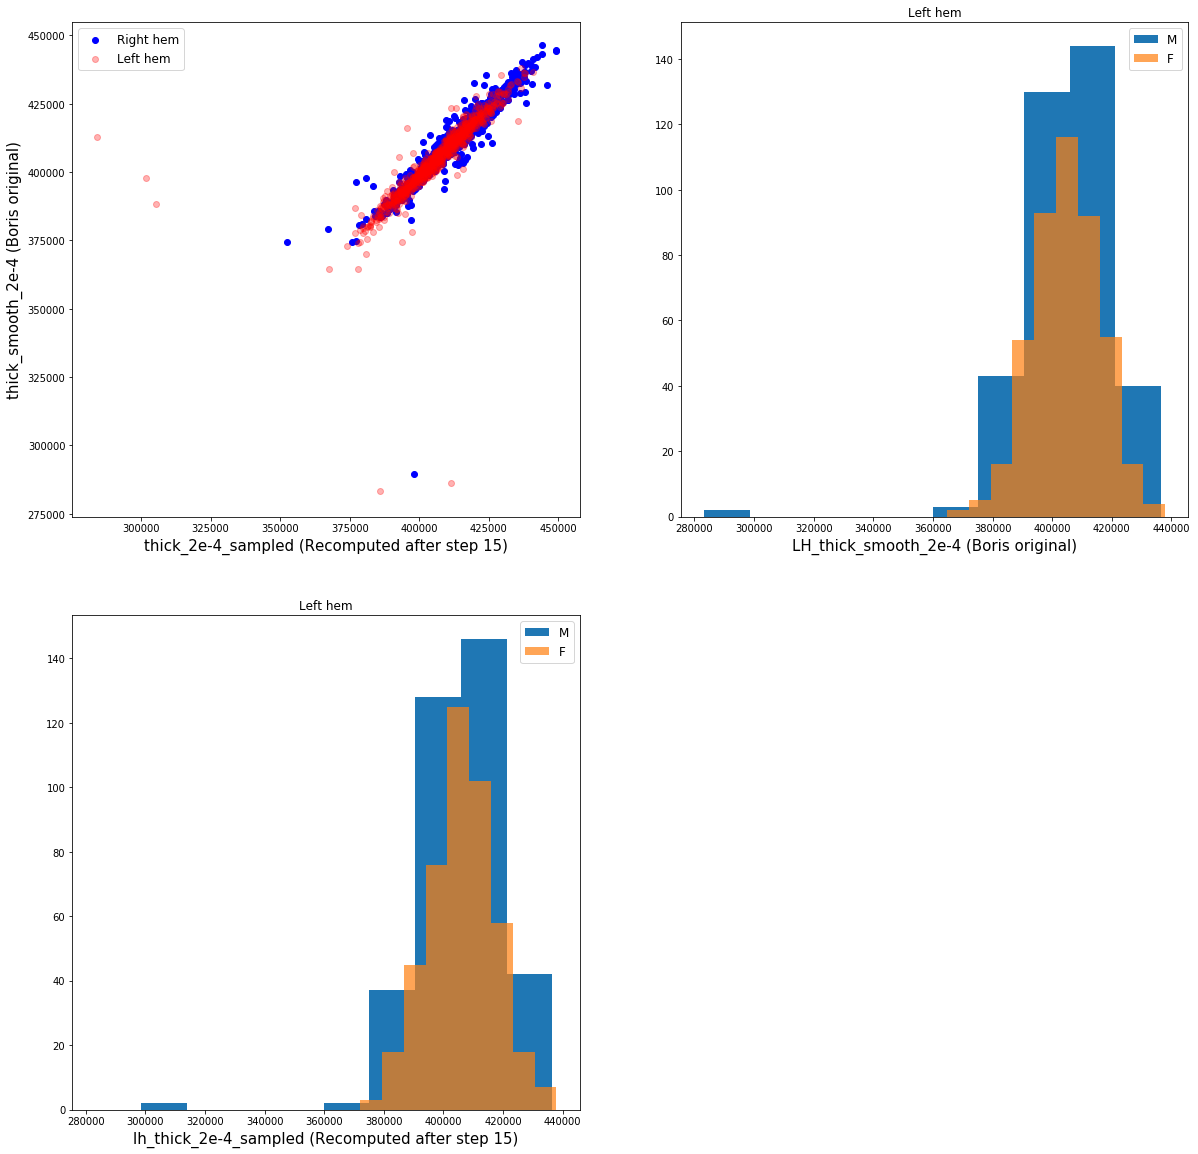

In [81]:
plt.rc('legend', fontsize=12) 
plt.rc('axes', labelsize=15) 

f, ax = plt.subplots(2,2, figsize=(20, 20))
ax[0,0].scatter(thickness['rh_thick_2e-4_sampled'],
                 thickness['RH_thick_smooth_2e-4'], c='b',label='Right hem')
ax[0,0].scatter(thickness['lh_thick_2e-4_sampled'],
                 thickness['LH_thick_smooth_2e-4'], c='r', alpha=0.3,  label='Left hem')
ax[0,0].set_xlabel('thick_2e-4_sampled (Recomputed after step 15)')
ax[0,0].set_ylabel('thick_smooth_2e-4 (Boris original)')
ax[0,0].legend();

# rh_m = thickness[thickness.Gender=='M']['RH_thick_smooth_2e-4'].dropna()#.values
# rh_f = thickness[thickness.Gender=='F']['RH_thick_smooth_2e-4']#.values

lh_m = thickness[thickness.Gender=='M']['LH_thick_smooth_2e-4'].dropna()#.values
lh_f = thickness[thickness.Gender=='F']['LH_thick_smooth_2e-4'].dropna()#.values


bins_m = ax[0,1].hist(lh_m, label='M')
bins_w = ax[0,1].hist(lh_f, label='F', alpha=0.7);
ax[0,1].legend()
ax[0,1].set_title('Left hem');
ax[0,1].set_xlabel('LH_thick_smooth_2e-4 (Boris original)')


lh_m = thickness[thickness.Gender=='M'].dropna()['lh_thick_2e-4_sampled']
lh_f = thickness[thickness.Gender=='F'].dropna()['lh_thick_2e-4_sampled']

ax[1,0].hist(lh_m, label='M', bins=bins_m[1])
ax[1,0].hist(lh_f, label='F', bins=bins_w[1], alpha=0.7);
ax[1,0].legend()
ax[1,0].set_title('Left hem');
ax[1,0].set_xlabel('lh_thick_2e-4_sampled (Recomputed after step 15)');

ax[1,1].set_visible(False)